# Programming for Economics


## Problem Set 04 - Week 5 - Group 02

*19/02/23*

In [13]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe 
from scipy import optimize
from scipy.optimize import minimize
import sympy as sym

### Exercise 1. Testing algorithms with the Rosenbrock function (30 points).

#### a. define the Rosenbrock function for a general number of variables N.

In [2]:
# Define Rosenbrock for arbitrary number of variables (N):

def rosen(X):
    Y = 0
    for i in range(len(X)-1):        #N as the length of the X vector
        Y += ((1-X[i])**2 + (X[i+1]-X[i]**2)**2)
    return Y

#### b. Testing the Brute-force algorithm. Using a range of (−2, 2) for all xi, find the minimum of the Rosenbrock function using the brute-force method for the three following cases: N = 3, N = 4, and N = 5. How does computational time increases as the number of variables N increases? linearly or exponentially on N?

In [3]:
# Brute force minimization of Rosenbrock function for various N (2,3,4,5)
N = (2,3,4,5)
t = []

for i in N:
    print(f'----------- For N = {i} -----------')
    ranges_X = ([(-2,2)]*i)
    qe.tic()
    res = optimize.brute(rosen, ranges_X)
    time = qe.toc()
    print('Minimum f(x):')
    print(rosen(res))
    print('Solutions (X):')
    print(res)
    t.append(time)

----------- For N = 2 -----------
TOC: Elapsed: 0:00:0.00
Minimum f(x):
3.0381658489133424e-10
Solutions (X):
[1.00001575 1.00002402]
----------- For N = 3 -----------
TOC: Elapsed: 0:00:0.06
Minimum f(x):
1.0641134812648927e-09
Solutions (X):
[1.00000773 1.00000816 0.99998657]
----------- For N = 4 -----------
TOC: Elapsed: 0:00:0.88
Minimum f(x):
1.181245701977129e-09
Solutions (X):
[1.00001192 0.99999483 0.99999232 0.9999744 ]
----------- For N = 5 -----------
TOC: Elapsed: 0:00:20.79
Minimum f(x):
9.23421240122741e-09
Solutions (X):
[1.00002079 1.00002544 1.00002247 1.00002408 0.99997355]


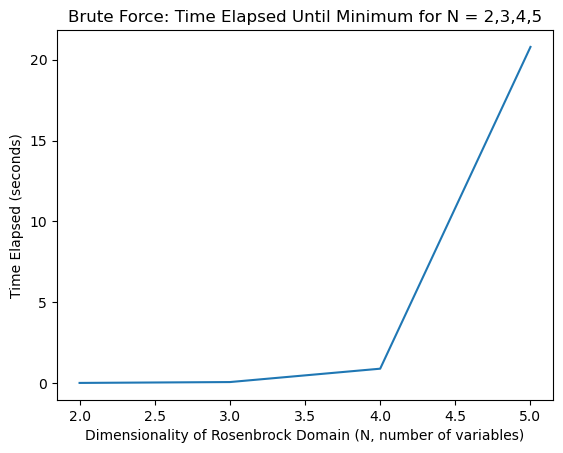

In [4]:
#Plot time elapsed for various N
fig, ax = plt.subplots()
ax.plot(N,t)
ax.set_xlabel('Dimensionality of Rosenbrock Domain (N, number of variables)')
ax.set_ylabel('Time Elapsed (seconds)')
ax.set_title("Brute Force: Time Elapsed Until Minimum for N = 2,3,4,5")
plt.show()

__Comment:__

Indeed, the time it takes to complete a __Brute Force__ optimization routine increases exponentially with the dimensionality of the function. This is because the number of grid points to evaluation is $P^N$, where __N__ is the dimensionality of the rosenbrock functions domain, and __P__ is the number of grid points to evaluate (=20, by default).

#### For the rest of the exercises use an initial value of zero for all the variables. That is x0 = [x01, x02, .., x0N] = [0, 0, ..., 0].

#### c. Find the minimum of the Rosenbrock function with N = 30 for the following three cases: using the BFGS method, using the Nelder-Mead method and using the Powell method. Which algorithm is faster?


In [14]:
# BFGS, Nelder-Mead, and Powell minimization of Rosenbrock for N=30
N = 30 
x0 = [0]*N
methods = ('BFGS', 'nelder-mead', 'powell')
t={}

for i in methods:
    print(f'----------- {i} -----------')
    qe.tic()
    res = optimize.minimize(rosen,x0, method=i)  
    time = qe.toc()
    print('Minimum f(x):')
    print(res.fun)
    print('Solutions (X):')
    print(res.x)
    t[i] = time

----------- BFGS -----------
TOC: Elapsed: 0:00:0.13
Minimum f(x):
5.162131218447532e-14
Solutions (X):
[0.99999997 0.99999996 0.99999998 0.99999999 0.99999997 0.99999996
 0.99999999 0.99999998 0.99999999 0.99999998 0.99999997 0.99999997
 0.99999998 0.99999999 0.99999998 0.99999997 0.99999998 0.99999997
 0.99999997 0.99999996 0.99999998 0.99999999 0.99999998 0.99999998
 0.99999998 0.99999997 0.99999997 0.99999997 0.99999991 0.99999981]
----------- nelder-mead -----------
TOC: Elapsed: 0:00:0.41
Minimum f(x):
26.88025980941206
Solutions (X):
[ 0.31365521  0.34632585  0.02665141  0.12452705  0.0735569  -0.01462056
 -0.03800573  0.26743923  0.22448517 -0.05536276 -0.03698538 -0.09697268
 -0.14043037 -0.14121111  0.04683407  0.03329068  0.14093007  0.10785231
  0.0973049   0.01228816 -0.05222262  0.26975194  0.11639877  0.24277025
 -0.06875607  0.18332532  0.17004997 -0.15675394  0.12177502 -0.91721526]
----------- powell -----------
TOC: Elapsed: 0:00:1.12
Minimum f(x):
9.457569190347289e

__Comment:__

With a minimum value of ~26.88, it appears that the __Nelder-Mead__ simplex has been trapped in a local minimum! To fix this, we need to move the initial guess closer to the global minimum or narrow the bounds towards the global minimum (which also requires the initial guess to move closer). 

Of course, if the underlying function is not known, but we must rely on the __Nelder-Mead__ method, we could iterate over a grid of several initial guesses to find the lowest local minimum. However, this also comes at a price of higher computation time. For now, we simply assume prior knowledge of the function and adjust the initial guess, accordingly. 

In [16]:
N=30
bnds = ([(-1.5,1.5)]*N)
x0 = [.75]*N

print(f'----------- Nelder-Mead -----------')
qe.tic()
res = optimize.minimize(rosen, x0, bounds=bnds, method='nelder-mead') 
bnds_time = qe.toc()
print('Minimum f(x):')
print(res.fun)
print('Solutions (X):')
print(res.x)
t["nelder-mead"] = bnds_time

----------- Nelder-Mead -----------
TOC: Elapsed: 0:00:0.50
Minimum f(x):
4.114894629217157e-05
Solutions (X):
[0.99982945 0.99971518 0.99908082 0.99958808 0.9999579  0.9989418
 0.99966436 0.99882523 1.00025727 0.99981253 0.99932542 0.9992631
 0.9996781  1.00017713 1.00095544 0.99998511 1.00079475 1.00040748
 1.00013457 1.0002115  0.9998428  0.99943692 0.99975216 0.99974982
 1.00022613 1.00032345 0.99995542 1.00055728 0.99954351 0.99693806]


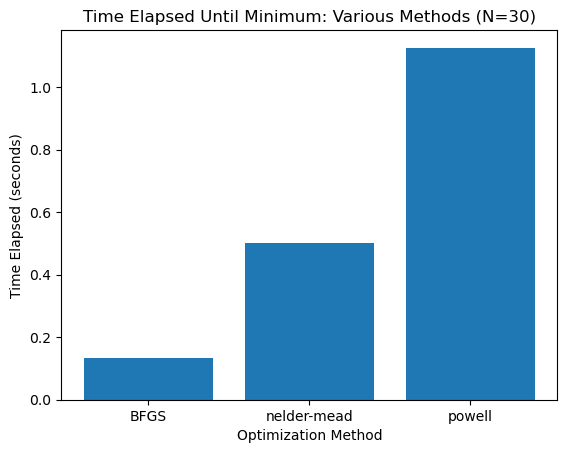

In [17]:
# Plot time elapsed
fig, ax = plt.subplots()
ax.bar(*zip(*t.items()))   #unzips dictionary into seperate key and value tuples
ax.set_xlabel("Optimization Method")
ax.set_ylabel("Time Elapsed (seconds)")
ax.set_title("Time Elapsed Until Minimum: Various Methods (N=30)")
plt.show()

__Comment:__ 

We see that the __BFGS__ method is fastest for N=30, with a time elapsed in the order of ~0.1 seconds. The BFGS advantage stems from its efficient use of second-order information (to decide how far to travel in the domain, in addition to what direction) and the Rosenbrock's relatively well-behaved or inexpensive-to-compute derivatives. __Nelder-Mead__ and __Powell__ search for the minimum directly and do not incorporate gradient or hessian information; in this context, (Rosenbrock, N=30) they take slightly longer. 

#### d. Let’s test the algorithms further. Minimize the Rosenbrock function for 100 variables, N=100. Use the BFGS method, the Nelder-Mead method and the Powell method. If N=100 with N=100 you can use another N like N=50.

In [18]:
# BFGS, Nelder-Mead, and Powell minimization of Rosenbrock for N=100
N = 100
x0 = [0]*N
methods = ('BFGS', 'nelder-mead', 'powell')
t={}

for i in methods:
    print(f'----------- {i} -----------')
    qe.tic()
    res = optimize.minimize(rosen,x0, method=i)  
    time = qe.toc()
    print('Minimum f(x):')
    print(res.fun)
    print('Solutions (X):')
    print(res.x)
    t[i] = time

----------- BFGS -----------
TOC: Elapsed: 0:00:1.24
Minimum f(x):
1.2369801480899815e-11
Solutions (X):
[1.00000005 1.         0.99999994 0.99999996 0.99999998 1.00000001
 1.00000002 0.99999998 0.99999995 0.99999998 0.99999999 1.
 0.99999997 0.99999995 0.99999995 0.99999998 1.00000005 1.00000012
 1.00000014 1.0000001  1.00000007 1.00000009 1.0000001  1.00000016
 1.00000016 1.00000001 0.99999995 1.         0.99999998 1.00000005
 1.00000012 0.99999997 0.9999998  0.99999978 0.9999998  0.99999992
 0.99999999 0.99999995 1.00000003 1.00000021 1.00000006 0.99999999
 0.99999982 0.99999959 0.99999987 1.00000045 1.0000003  0.9999995
 0.99999966 1.00000041 0.99999993 0.99999985 1.0000001  0.99999974
 1.00000008 1.00000021 0.99999967 0.99999979 1.00000012 1.0000003
 1.00000011 0.99999957 0.99999957 1.00000002 1.00000023 1.00000024
 1.00000006 0.99999992 0.99999984 0.99999983 0.99999981 0.9999999
 0.99999999 0.99999992 0.99999996 1.00000009 1.0000001  1.00000008
 1.00000009 1.         0.9999999  0

__Comment:__

As in the N=30 case, we see that the __Nelder-Mead__ simplex has been trapped in a local max. We can adjust our initial guess: 

In [19]:
N = 100
x0 = [.99]*N

print(f'----------- Nelder-Mead -----------')
qe.tic()
res = optimize.minimize(rosen, x0, method='nelder-mead') 
bnds_time = qe.toc()
print('Minimum f(x):')
print(res.fun)
print('Solutions (X):')
print(res.x)
t["nelder-mead"] = bnds_time

----------- Nelder-Mead -----------
TOC: Elapsed: 0:00:2.53
Minimum f(x):
1.6071944545823442e-07
Solutions (X):
[1.00000897 1.00001641 0.99998939 0.99998394 0.99998303 0.9999658
 0.99995844 0.99995802 0.999991   0.99998001 0.99999053 0.99997122
 0.99997275 0.99997493 0.99998597 0.99999942 1.00000227 1.00003305
 1.00002215 1.0000125  0.999997   1.00000133 0.99998154 0.99997317
 0.9999732  0.99997337 0.99998784 0.99998917 0.9999912  0.99995946
 0.99996516 0.99998747 1.00003017 1.00001396 0.99999217 0.99998121
 0.99997626 0.99998874 1.00000274 0.99999533 1.00001335 1.00002351
 1.00003033 1.0000466  1.00003064 1.00001221 1.00002311 1.00002422
 1.00000128 1.00000639 1.00002839 1.00001893 1.00000538 0.99996653
 0.9999816  0.99999894 0.99999066 1.00001206 0.99996362 1.00000377
 0.99999258 1.00000573 1.00002354 1.00000514 1.0000039  0.99999384
 1.00001584 1.00001681 1.00001003 1.00000292 0.99999564 0.99996935
 0.9999677  0.99995258 0.99996798 0.99998267 1.00000221 1.00001558
 1.00002158 0.9999

__Comment:__

Interestingly, the __Nelder-Mead__ sensitivity to the initial guess increases with the dimensionality of the function (when N=100, the initial guess, ~0.98, has to be very close to the optimal solution). Intuitively, there are more directions for the simplex to get trapped in a local max when dimensionality is high. 

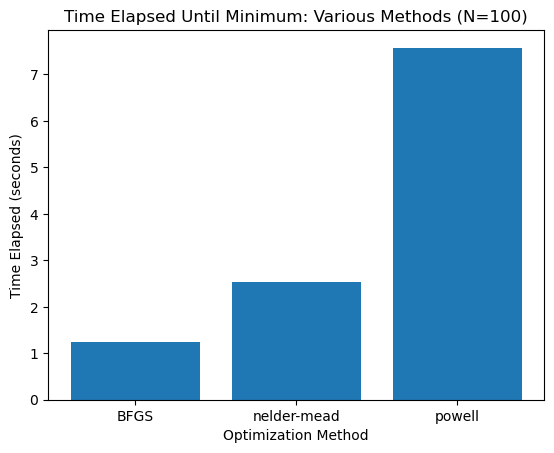

In [20]:
# Plot time elapsed
fig, ax = plt.subplots()
ax.bar(*zip(*t.items()))
ax.set_xlabel("Optimization Method")
ax.set_ylabel("Time Elapsed (seconds)")
ax.set_title("Time Elapsed Until Minimum: Various Methods (N=100)")
plt.show()

__Comment:__

As in the N=30 case, the __BFGS__ is the fastest when N=100. It appears that the relative speeds of these algorithms have changed slightly: both the __BFGS__ and __Nelder-Mead__ elapsed times have climbed up somewhat towards __Powell__. Perhaps, in the context of the Rosenbrock function and particularly high N, the ease of calculating conjugate vectors begins to slowly gain on the __BFGS__ Hessian approximation or __Nelder-Mead__ Simplex. Nevertheless, __BFGS__ remains the fastest, and the sensitivity __Nelder-Mead__ to local traps is increasing greatly in large dimensions, so __BFGS__ is still preffered since derivative information is known.

#### e. Algorithms comparison. For this exercise we see that there is one algorithm that tends to to do better than the rest (especially when N is large). Which algorithm is and why? you might want to comment on the properties of the function we are minimizing and the characteristics of the algorithm.

__Answer:__

For both N=30 and N=100 (and 200), the fastest algorithm is, by far, the __BFGS__ method. There are likely several reasons why this is the case, but one immediate expalanation might lie in its efficient use of second-order derivative information, and the well-behaved nature of the Rosenbrock function. The __BFGS__ is a type of Quasi-Newton method that utilizes the Hessian, the second-order analogue to the Gradient determine an optimal step-size, or how far to move within the domain. However, __BFGS__ is special in that it uses the Gradient (via directional line search) to refine an approximation of the inverse Hessian, rather than recalculating it at every step. As a result, it moves swiftly and efficienctly across the domain of functions whose derivatives are relatively well-behaved or inexpensive to compute (like the Rosenbrock). 
(https://machinelearningmastery.com/bfgs-optimization-in-python/), 
(http://scipy-lectures.org/advanced/mathematical_optimization/)

Thus, in this context (moderately large N, Rosenbrock function), the __BFGS__ outperforms direct search methods, such as __Nelder-Mead__ and __Powell__. The __Nelder-Mead__ method utilizes a simplex shape to iteratively search for, travel towards, and narrow down on the minimum. In essence, the algorithm calculates the centroid of all corners of the simplex (excluding the worst point AKA largest-valued one), the reflection of the worst point about the centroid, and then checks the value of this  reflection point to decide whether to expand towards or contract away from its direction by replacing the worst point. Because it does not utilize derivative information, it can work for functions that are not completely locally smooth (not differentiable). (https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

In our context, the __BFGS__ method also outperforms the __Powell__ method, another direct search algorithm. The __Powell__ method calculates congugate directions from minimizing the function along search vectors to narrow down on the minimum. Essentially, from a starting point, it minimizes the function in two anti-parallel directions and draws a third direction crossing over these distinct minima. It minimizes the function in the conjugate direction, and from this 3rd minimum, draws and minimizes in directions parallel to the previous two directions. It then calculates a new conjugate direction, and so on. Thus, its overall efficiency greatly depends on the algorithm used to minimize along the search vector (typically the hybrid Brent's method).
(https://www.youtube.com/watch?v=1Z_4sBNoZj4&ab_channel=EMPossible), (https://en.wikipedia.org/wiki/Powell%27s_method)

Overall, it appears that __BFGS__ is best if the Gradient and Hessian exist or are easily computable (i.e., from a known well-behaved function, such as Rosenbrock). __Nelder-Mead__ and __Powell__ methods would likely fare better if the function is not fully known across its domain or is sufficiently "noisy" (not locally smooth). It should be noted, however, that none of these three algorithms are robust to local traps. To avoid getting stuck in local minima or saddle points, it is recommended to incorporate additional information about the function over a larger scope of the domain. For instance, one could construct a grid of starting points, similar to __Brute Force__. Alternatively, one could attempt one of the numerous deterministic, stochastic, and metaheuristic approaches aimed at escaping local traps. Some notable ones include branch-and-bound, Monte Carlo method-sampling, evolutionary algorithms, memetic algorithms, reactive search optimization, and simulated annealing. (https://en.wikipedia.org/wiki/Global_optimization), 
(http://scipy-lectures.org/advanced/mathematical_optimization/)

### Exercise 2. Steady states and transitions in a Solow economy (30 points)

#### a. Calibration exercise. What are the values of the saving rate, s, and the TFP, A, such that in steady state the output per worker is equal to 10, and the captial-output ratio is equal to 4?


In [21]:
# Set Parameters
alpha = 0.3
delta = 0.1
params = [alpha,delta]

# Define steady state function:
def steady_state_solow(unkown,params):
    s,A = unkown
    alpha, delta = params
    k = (((s*A)/delta)**(1/(1-alpha)))
    eq_1 =  A*(k**alpha) - 10
    eq_2 = k/(A*(k**alpha)) - 4
    return np.array([eq_1,eq_2])

# Starting point guess
start = [1,1]

# Sovle for or unknown: s and A
roots = optimize.fsolve(steady_state_solow, start, args=(params))

# Store solution
A_old = roots[1]
s_old = roots[0]

# Display solution
print('Total Factor Productivity:', np.round(A_old,2))
print('Saving rate:',np.round(s_old, 2))

Total Factor Productivity: 3.31
Saving rate: 0.4


In [22]:
# Alternatively, we can solve this using symbolic programming (SymPy):
import sympy as sym

# Define variables as symbolic objects
A,s,k,y = sym.symbols("A,s,k,y")

# Define equations
f = sym.Eq(y, 10)
g = sym.Eq(k/y, 4)
h = sym.Eq((s*A/delta)**(1/(1-alpha)), k)
l = sym.Eq(A*k**(alpha), y)

#solve the system
sym.solve([f,g,h,l])

[{k: 40.0000000000000,
  y: 10.0000000000000,
  A: 3.30660259774784,
  s: 0.400000000000000}]

#### b. A new steady state. Now, suppose there is a positive TFP shock and A doubles with respect to the value you found on a). Keeping everything else unchanghed, that is with the s you found on a) and α = 0.3, δ = 0.1, what is the new steady state capital per worker, k∗, and output per worker, y∗?

In [24]:
# Define new output level, set parameters
A_new = A_old * 2
alpha = 0.3
delta = 0.1

# Define steady state of capital per worker
def k_star_func(s, A, delta, alpha):
    k_star = (((s*A)/delta)**(1/(1-alpha)))
    return k_star

# Define steady state of output per worker
def y_star_func(A, k_star, alpha):
    y_star = A*(k_star**alpha)
    return y_star

# Calculate steady states before and after shock
k_star_old = k_star_func(s_old, A_old, delta, alpha)
k_star_new = k_star_func(s_old, A_new, delta, alpha)

y_star_old = y_star_func(A_old, k_star_old, alpha)
y_star_new = y_star_func(A_new, k_star_new, alpha)

# Display the solutions
print('New steady state level of capital per worker:', np.round(k_star_new,2))
print('New steady state level of output per worker:', np.round(y_star_new,2))

New steady state level of capital per worker: 107.67
New steady state level of output per worker: 26.92


#### c. Computing the transition to the new steady state. Plot the capital per worker and output per worker dynamics from the steady state in a) to the new steady state in b).

In [25]:
# Define starting value of capital
k0 = k_star_old

# Define law of motion of capital
def law_of_motion(s, A, alpha, delta, k):
    k_plus1 = s*A*(k**alpha) + (1-delta)*k
    return k_plus1

# Set parameters
eps = 0.5  #Error tolerance. 
t0 = 0
t = []
k_bin=[]

# While loop: iterate through values of k until distance from steady state is within error tolerance
while np.abs(k_star_new - k0) >= eps:
    kplus = law_of_motion(s_old, A_new, alpha, delta, k0)
    k_bin.append(kplus)
    k0 = kplus
    t0 += 1
    t.append(t0)
    
# Calculate corresponding y_star values.
y_func = lambda k: y_star_func(A_new, k, alpha)  #Redefine y_star_func with a single variable
y_bin = map(y_func, k_bin)    #Calculates y_star values corresponding to the given k_star values
y_bin_list = list(y_bin)


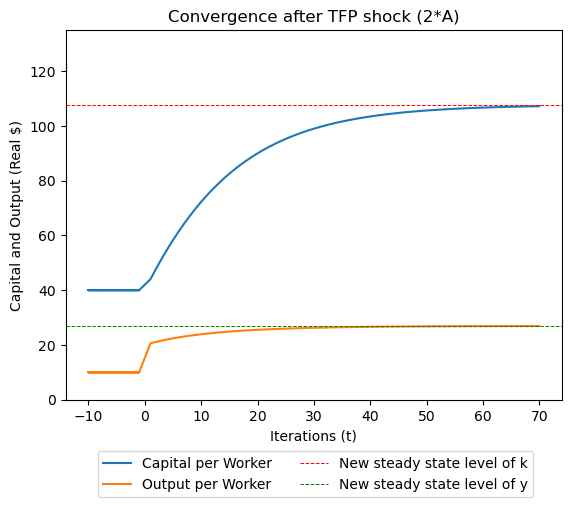

In [27]:
# Plot steady state dynamics

# Insert previous levels of y and k before t=0 to show shock.
for i in range(1,11):
    t.insert(0, -i)
    k_bin.insert(0, 40)
    y_bin_list.insert(0, 10)
    
# Plot convergence to new steady state values
fig, ax = plt.subplots()
ax.plot(t, k_bin, label = 'Capital per Worker')
ax.plot(t, y_bin_list, label = 'Output per Worker')
ax.axhline(k_star_new, color = 'r', linestyle = '--', linewidth = 0.7, label = 'New steady state level of k')
ax.axhline(y_star_new, color = 'g', linestyle = '--', linewidth = 0.7, label = 'New steady state level of y')

ax.set_ylim(0,135)
ax.set_xlabel('Iterations (t)')
ax.set_ylabel('Capital and Output (Real $)')
ax.set_title('Convergence after TFP shock (2*A)')
ax.legend(loc = 'upper left', bbox_to_anchor=(0.05,-0.12), ncol=2)

plt.show()

__Comment:__

In response to a large, exogeneous TFP shock, Output per worker jumps discontinuously (output per worker is, itself, a function of TFP). Additionally, the diminishing marginal returns to capital per worker shift up, so capital per worker quickly begins to grow to a new steady state. As these returns diminish, capital per worker is within epsilon of its new steady state in 70 iterations. As a function of capital per worker, output per worker evolves towards the steady-state similarly. 

### Exercise 3. Optimal life-cycle consumption paths (40 points):

#### a. A two-period model: consider the problem of an individual that lives for two periods (t = 0, t = 1) and maximizes his/her lifetime utility, subject that the budget constraint at each period hold.

In [54]:
from scipy.optimize import minimize

# Define utility function
def utility(c, theta):
    return (c**(1 - theta))/(1 - theta)

# Define objective function
def objective(X, Y, params):
    c0, c1, a1 = X
    y0, y1 = Y
    a0, beta, theta, r = params 
    return -(utility(c0, theta) + beta*utility(c1, theta))

# Define budget constraints
def budget_constraint(X, Y, params):
    c0, c1, a1 = X
    y0, y1 = Y
    a0, beta, theta, r = params
    
    eq1 = c0 + a1 - a0 - y0
    eq2 = c1 - (1+r)*a1 - y1
    return [eq1 ,eq2]

# Set Parameters
x0 = [1,1,1]   #Initial guess
a0 = 0
beta = 0.96
theta = 1.5
r = 1/beta - 1
Y = [10,5]
params = [a0, beta, theta, r]

# Specify minimizer constraint type 
cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}

# Solve the optimization problem
result_certain = minimize(objective, x0, args=(Y,params), constraints=cons)

c0_optimal, c1_optimal, a1_optimal= result_certain.x
print(f"Optimal c0: {c0_optimal:.2f}")
print(f"Optimal c1: {c1_optimal:.2f}")
print(f"Optimal a1: {a1_optimal:.2f}")

Optimal c0: 7.55
Optimal c1: 7.55
Optimal a1: 2.45


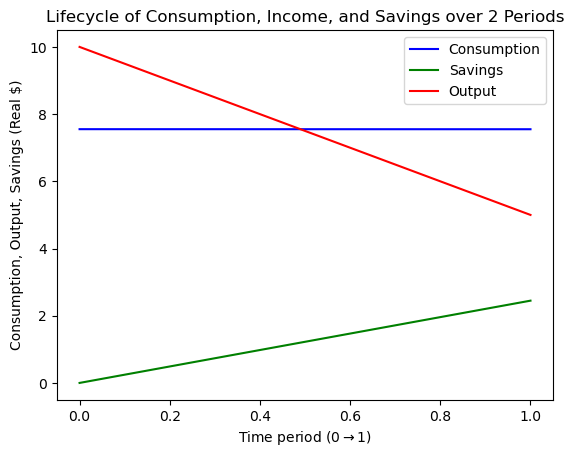

In [17]:
# Plot the 2-period lifecycle
t = [0,1]
Y = [10,5]
assets = np.append(0, result_certain.x[2:])
consumption = result_certain.x[:2]

fig, ax = plt.subplots()
ax.plot(t, consumption, "b")
ax.plot(t, assets, "g")
ax.plot(t, Y, "r")
ax.legend(['Consumption', 'Savings', 'Output'])  
ax.set_xlabel(r"Time period ($ 0 \rightarrow 1 )$")  
ax.set_ylabel("Consumption, Output, Savings (Real $)")  
ax.set_title("Lifecycle of Consumption, Income, and Savings over 2 Periods")
plt.show()

__Comment:__

Over the two periods, consumption is succesfully smoothed due to the relative risk aversion parameter, theta = 1.5, which implies a convex form of the utility function. What is interesting is that a negative theta would lead to risk seeking behaviour and the agent would optimize by consuming everything in one period. In this case in both periods, the agent consumes ~7.55, and is left with savings ~2.46 in period 1, which they consume. The agent sacrifices some consumption in period 0 for the interest gained in period 1 (although not too much, as they still seek to smooth their lifecycle), because they are only slightly impatient: utility in the final period is discounted by beta, which is close to 1.

#### b. A life-cycle model with 4 periods

In [45]:
# Define utility function
def utility(c, theta):
    return (c**(1 - theta))/(1 - theta)

# Define objective function
def objective(X, Y, params):
    c0, c1, c2, c3, a1, a2, a3 = X
    y0, y1, y2, y3 = Y
    a0, beta, theta, r = params 
    
    return -(utility(c0, theta) + beta*utility(c1, theta) + beta**2*utility(c2, theta) + beta**3*utility(c3, theta))

# Define budget constraints
def budget_constraint(X, Y, params):
    c0, c1, c2, c3, a1, a2, a3 = X
    y0, y1, y2, y3 = Y
    a0, beta, theta, r = params
    
    eq1 = c0 + a1 - a0 - y0
    eq2 = c1 + a2 - (1+r)*a1 - y1
    eq3 = c2 + a3 - (1+r)*a2 - y2
    eq4 = c3 - (1+r)*a3 - y3
    
    return [eq1 ,eq2, eq3, eq4]

# Set Parameters
x0 = [1,1,1,1,1,1,1]   #Initial guess
a0 = 0
beta = 0.96
theta = 1.5
r = 1/beta - 1
Y = [5,10,15,0]
params = [a0, beta, theta, r]

# Specify minimizer constraint type 
cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}

# Solve the optimization problem
result = minimize(objective, x0, args=(Y,params), constraints=cons)

c0_optimal, c1_optimal, c2_optimal, c3_optimal, a1_optimal, a2_optimal, a3_optimal= result.x
print(f"Optimal c0: {c0_optimal:.2f}")
print(f"Optimal c1: {c1_optimal:.2f}")
print(f"Optimal c2: {c2_optimal:.2f}")
print(f"Optimal c3: {c3_optimal:.2f}")

Optimal c0: 7.49
Optimal c1: 7.53
Optimal c2: 7.58
Optimal c3: 7.60


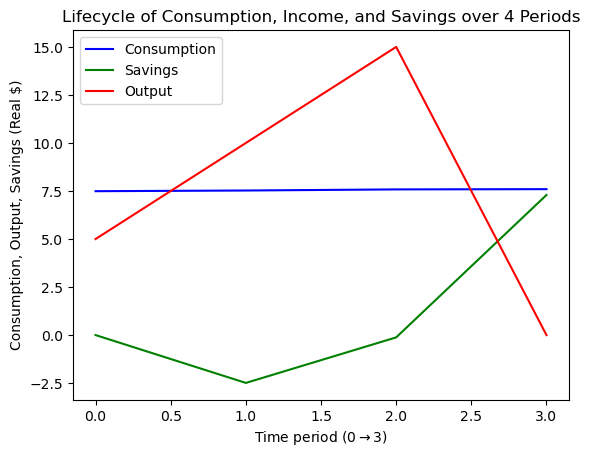

In [43]:
# Plot the 4-period lifecycle
t = [0,1,2,3]
Y = [5,10,15,0]
consumption = result.x[:4]
assets = np.append(0,result.x[4:])

fig, ax = plt.subplots()
ax.plot(t, consumption, "b")
ax.plot(t, assets, "g")
ax.plot(t, Y, "r")
ax.legend(['Consumption', 'Savings', 'Output'])  
ax.set_xlabel(r"Time period ($ 0 \rightarrow 3 )$")  
ax.set_ylabel("Consumption, Output, Savings (Real $)")  
ax.set_title("Lifecycle of Consumption, Income, and Savings over 4 Periods")
plt.show()

__Comment:__

We observe a similar smoothed consumption lifecycle (~7.5) as in the two period case. However, now savings briefly becomes negative (i.e., the individual goes into debt) in period 1. We can impose an additional inequality constraint to ensure that savings can never go below zero to represent a consumer that is liquidity-constrained (unable to borrow).

In [47]:
# Case 1: Agent is unable to borrow, but can save
def liquidity_constraint(X, Y, params):
    c0, c1, c2, c3, a1, a2, a3 = X
    return [a1,a2,a3]

cons1 = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}
cons2 = {'type': 'ineq', 'fun': liquidity_constraint, 'args': (Y, params)}
cons = [cons1, cons2]

result = minimize(objective, x0, args=(Y,params), constraints=cons)

c0_optimal, c1_optimal, c2_optimal, c3_optimal, a1_optimal, a2_optimal, a3_optimal= result.x
print(f"Optimal c0: {c0_optimal:.2f}")
print(f"Optimal c1: {c1_optimal:.2f}")
print(f"Optimal c2: {c2_optimal:.2f}")
print(f"Optimal c3: {c3_optimal:.2f}")

Optimal c0: 5.00
Optimal c1: 8.46
Optimal c2: 8.47
Optimal c3: 8.47


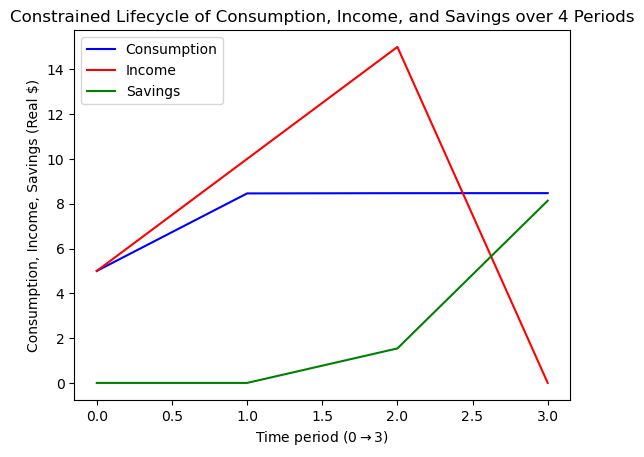

In [21]:
# Plot the 4-period (liquidity-constrained) lifecycle when agent is unable to borrow, but can save (Case 1)
t = [0,1,2,3]
Y = [5,10,15,0]
consumption = result.x[:4]
assets = np.append(0,result.x[4:])

fig, ax = plt.subplots()
ax.plot(t, consumption, "b")
ax.plot(t, Y, "r")
ax.plot(t, assets, "g")
ax.legend(['Consumption', 'Income', 'Savings'])  
ax.set_xlabel(r"Time period ($ 0 \rightarrow 3 )$")  
ax.set_ylabel("Consumption, Income, Savings (Real $)")  
ax.set_title("Constrained Lifecycle of Consumption, Income, and Savings over 4 Periods")
plt.show()

__Comment:__

Now that the individual is unable to borrow, they consume less in the first period than they would prefer (5 vs. 7.5) given their risk-aversion and impatience. They are left with higher consumption in future periods once they become less liquidity-constrained via rising income.

Next, we explore what happens when we add the opposing "illiquidity-constraint"; that is, the consumption lifecycle when the agent is unable to save, as well as the case where there are no saving or borrowing mechanisms available to the agent, at all. In the latter case, both asset constrains are binding, and the individual has practically no access to financial markets.

In [48]:
# Case 2: Agent is unable to save, but can borrow 
def illiquidity_constraint(X, Y, params):
    c0, c1, c2, c3, a1, a2, a3 = X
    return [-a1,-a2,-a3]

cons1 = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}
cons2 = {'type': 'ineq', 'fun': illiquidity_constraint, 'args': (Y, params)}
cons = [cons1, cons2]

result = minimize(objective, x0, args=(Y,params), constraints=cons)
c0_optimal, c1_optimal, c2_optimal, c3_optimal, a1_optimal, a2_optimal, a3_optimal= result.x
print(f"Optimal c0: {c0_optimal:.2f}")
print(f"Optimal c1: {c1_optimal:.2f}")
print(f"Optimal c2: {c2_optimal:.2f}")
print(f"Optimal c3: {c3_optimal:.2f}")

Optimal c0: 7.97
Optimal c1: 9.76
Optimal c2: 12.03
Optimal c3: 0.00


/var/folders/l8/5mwl2q5j02n383jpzfpx64bh0000gn/T/ipykernel_21882/1896973735.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c**(1 - theta))/(1 - theta)


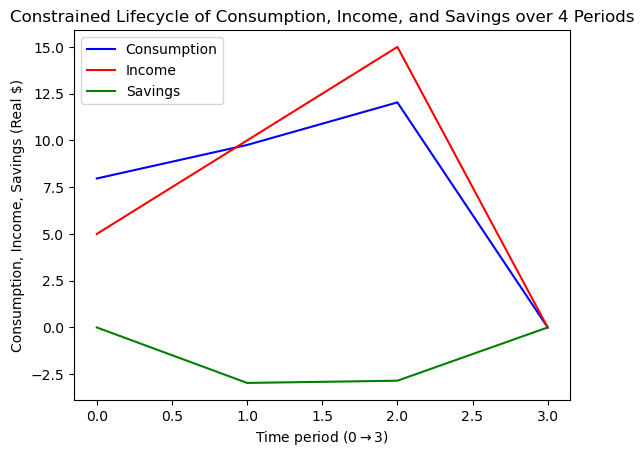

In [23]:
# Plot the 4-period (liquidity-constrained) lifecycle when agent is unable to save, but can borrow (Case 2)
t = [0,1,2,3]
Y = [5,10,15,0]
consumption = result.x[:4]
assets = np.append(0,result.x[4:])

fig, ax = plt.subplots()
ax.plot(t, consumption, "b")
ax.plot(t, Y, "r")
ax.plot(t, assets, "g")
ax.legend(['Consumption', 'Income', 'Savings'])  
ax.set_xlabel(r"Time period ($ 0 \rightarrow 3 )$")  
ax.set_ylabel("Consumption, Income, Savings (Real $)")  
ax.set_title("Constrained Lifecycle of Consumption, Income, and Savings over 4 Periods")
plt.show()

__Comment:__

With no ability to save, but still the ability to borrow, the agent tries their best to smooth consumption given the highly convex income lifecycle. As a result, they take on significant debt in the middle periods of the lifecycle and gradually unwind this debt in later periods. The debt allows the agent to consume beyond their income in earlier periods and the principal + interest paid on this debt in the middle and latter periods allows the agent to slightly cushion the income peak in period 2. Neverthelesss, their consumption lifecycle remains relatively convex.

In [50]:
# Case 3: Agent is unable to save and borrow. They have no access to financial markets. 
cons1 = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}
cons2 = {'type': 'ineq', 'fun': liquidity_constraint, 'args': (Y, params)}
cons3 = {'type': 'ineq', 'fun': illiquidity_constraint, 'args': (Y, params)}
cons = [cons1, cons2, cons3]

result = minimize(objective, x0, args=(Y,params), constraints=cons)
c0_optimal, c1_optimal, c2_optimal, c3_optimal, a1_optimal, a2_optimal, a3_optimal= result.x
print(f"Optimal c0: {c0_optimal:.2f}")
print(f"Optimal c1: {c1_optimal:.2f}")
print(f"Optimal c2: {c2_optimal:.2f}")
print(f"Optimal c3: {c3_optimal:.2f}")

Optimal c0: 5.00
Optimal c1: 10.00
Optimal c2: 15.00
Optimal c3: 0.00


/var/folders/l8/5mwl2q5j02n383jpzfpx64bh0000gn/T/ipykernel_21882/1896973735.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c**(1 - theta))/(1 - theta)


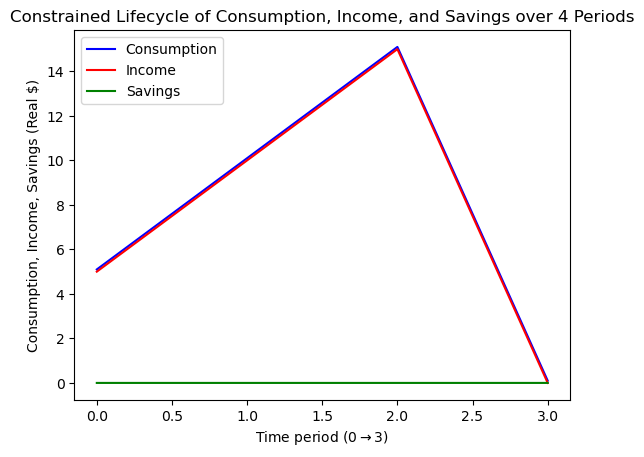

In [25]:
# Plot the 4-period (liquidity-constrained) lifecycle when agent is unable to save and borrow (Case 3)
t = [0,1,2,3]
Y = [5,10,15,0]
consumption = result.x[:4]
assets = np.append(0,result.x[4:])
displacement = 0.1  #Displace consumption to be able to see it adjacent to output

fig, ax = plt.subplots()
ax.plot(t, consumption+displacement, "b")
ax.plot(t, Y, "r")
ax.plot(t, assets, "g")
ax.legend(['Consumption', 'Income', 'Savings'])  
ax.set_xlabel(r"Time period ($ 0 \rightarrow 3 )$")  
ax.set_ylabel("Consumption, Income, Savings (Real $)")  
ax.set_title("Constrained Lifecycle of Consumption, Income, and Savings over 4 Periods")
plt.show()

__Comment:__

With no access to financial markets, and no ability to save or borrow, the agent is forced to consume at the full convexity of the income lifecycle. They have no decision power when it comes to their intertemporal consumption, with a great cost to overall utility compared to the case where they are able to freely smooth consumption according to their risk-aversion. Since most people are somewhat risk-averse, this highlights an important lesson for developing economies: reliable financial markets are crucial for smoothing consumption (and potentially increasing overall wellbeing), especially in a world where future income is uncertain.

#### c. Comparative statics.  Solve the problem in b) for r=0.01 (case 1), for r=0.04 (case 2) and for r=0.08 (case 3). Plot the optimal consumption path along the 4 periods for each of the three cases. How does the optimal life-cycle consumption changes as r changes?

In [51]:
# Set parameters

a0 = 0
beta = 0.96
theta = 1.5
r = 1/beta - 1
Y = [5,10,15,0]
x0 = [1,1,1,1,1,1,1]
r = [0.01, 0.04, 0.08]
optimal_c = []

# For loop: r=0.01, 0.04, 0.08
for i in r:
    params = [a0, beta, theta, i]
    cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}
    res_i = minimize(objective, x0, args=(Y,params), constraints=cons)
    optimal_c.append(res_i.x[:4])    #Extract c*

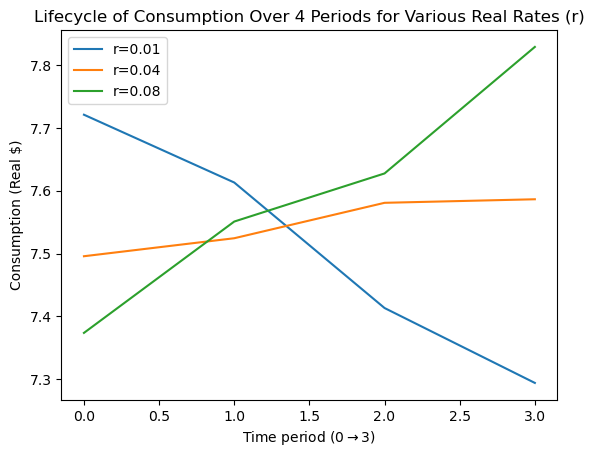

In [52]:
# Plot consumption life cycle for various r
t = [0,1,2,3]

fig, ax = plt.subplots()

for i in range(3):
    ax.plot(t, optimal_c[i], label=f"r={r[i]}")
ax.legend() 
ax.set_xlabel(r"Time period ($ 0 \rightarrow 3 )$")  
ax.set_ylabel("Consumption (Real $)")  
ax.set_title("Lifecycle of Consumption Over 4 Periods for Various Real Rates (r)")
plt.show()

__Comment:__

We see that as the real rate increases, the derivative of the lifecycle of consumption becomes positive and increasingly large in magnitude. In other words, the risk-averse individual faces a greater incentive to save in early periods and reap the return on their savings in later periods.

#### d. Optimal consumption paths under income risk. Now let’s solve the original 2-period model with uncertainty. Suppose that period 1 income, y1, is unknown: with probability pl = 0.5 it takes a low realization yl1 = 2.5, with probability ph = 0.5 it takes a high realization yh1 = 7.5. The rest of parametersand assumptions are exactly as in exercise a). solve the optimal consumption and saving decisions thatmaximize the expected lifetime utility.

In [53]:
# Utility function - same as before
def utility(c, theta):
    return (c**(1 - theta))/(1 - theta)

# Define consumption function
def consumption(y, a1, r):
    return (1+r)*a1 + y

# Define objective function
def objective(X, Y, params):
    c0, c1, a1, = X
    y0, y1l, y1h = Y
    a0, beta, theta, r, pl, ph = params 
    return -(utility(c0, theta) + beta*(pl*utility(consumption(y1l, a1, r), theta) + ph*utility(consumption(y1h, a1, r), theta)))

# Set Parameters 
x0 = [1,1,1]     #Initial guess
a0 = 0
beta = 0.96
theta = 1.5
r = 1/beta - 1
y1l = 2.5
y1h = 7.5
Y = [10, 2.5, 7.5]
pl=0.5
ph=0.5
params = [a0, beta, theta, r, pl, ph]


# For loop: define budget constraint and solve depending on the income realization (high or low)
optimal_c = []
assets = []  
result = []
realized_y = [2.5,7.5]

for i in realized_y:
    
    # Define budget constraints:
    def budget_constraint(X, Y, params):
        c0, c1, a1, = X
        y0, y1l, y1h = Y     #Realized
        a0, beta, theta, r, pl, ph = params 
        eq1 = c0 + a1 - a0 - y0
        eq2 = c1 - (1+r)*a1 - i
        return [eq1,eq2]
        cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}

    # Specify constraint type to minimizer
    cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}

    # Solve the optimization problem
    res_i = minimize(objective, x0, args=(Y,params), constraints=cons)
    result.append(res_i.x)
    optimal_c.append(res_i.x[:2])
    assets.append(np.insert(res_i.x[2:],a0,0))

print(f"low income lifecycle: {result[0]}")
print(f"high income lifecycle: {result[1]}")

low income lifecycle: [7.08622617 5.53518107 2.91377383]
high income lifecycle: [ 7.08783449 10.53350574  2.91216551]


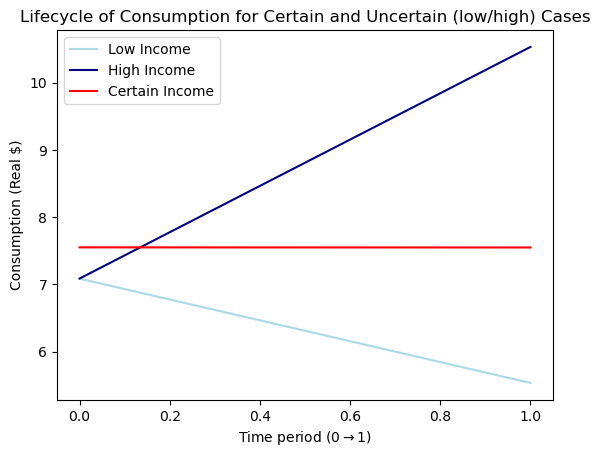

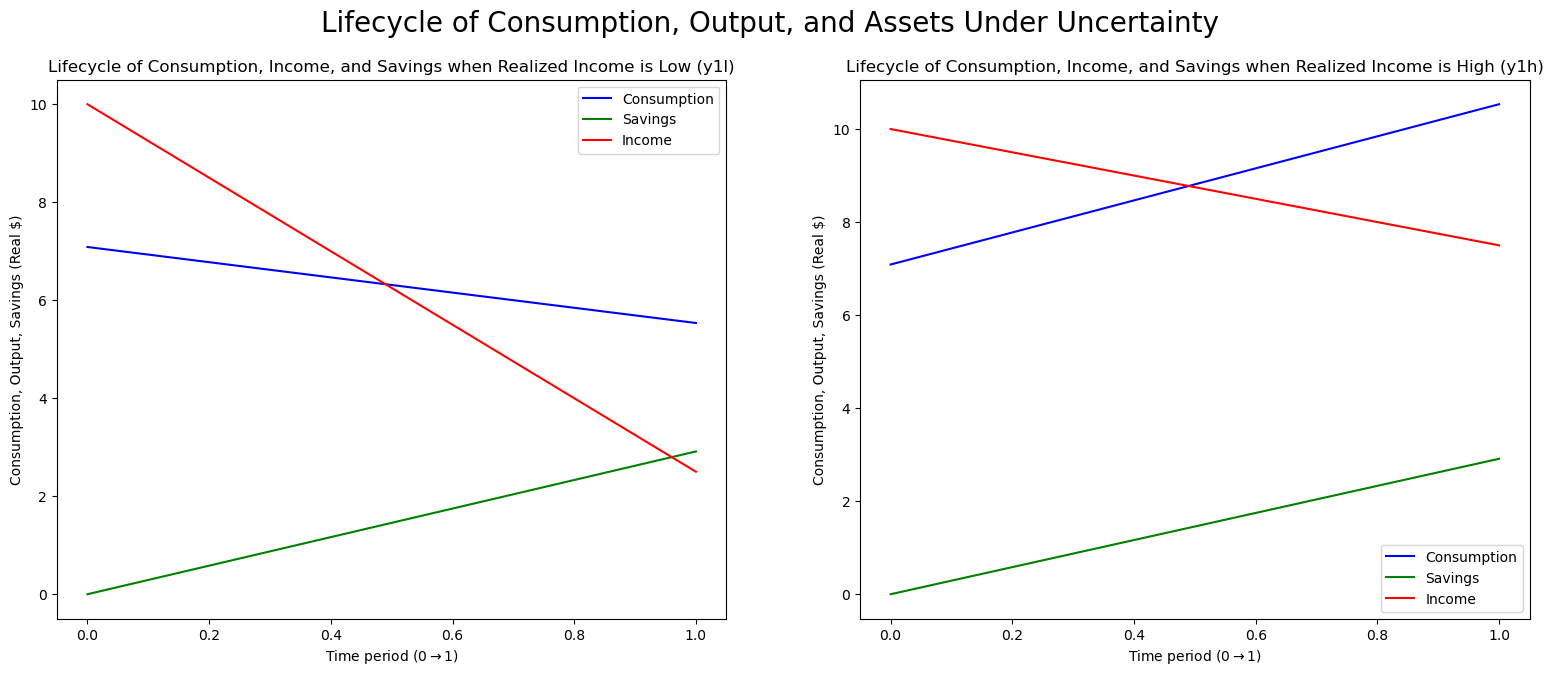

In [29]:
# Plot 1: Comparing consumption lifecycle
t = [0,1]

fig, ax = plt.subplots()
ax.plot(t, optimal_c[0], "lightblue", label="Low Income")
ax.plot(t, optimal_c[1], "navy", label="High Income")
ax.plot(t, result_certain.x[:2], "r", label="Certain Income")
ax.legend()  
ax.set_xlabel(r"Time period ($ 0 \rightarrow 1 )$")  
ax.set_ylabel("Consumption (Real $)")  
ax.set_title("Lifecycle of Consumption for Certain and Uncertain (low/high) Cases")
plt.show()    


# Plot 2: Comparing income, consumption, and savings lifecycle
income_paths = [[10, 2.5],[10, 7.5]]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19,7))
for i in range(2):
    ax[i].plot(t, optimal_c[i], "b", label="Consumption")
    ax[i].plot(t, assets[i], "g", label="Savings" )
    ax[i].plot(t, income_paths[i], "r", label="Income")
    ax[i].legend()  
    ax[i].set_xlabel(r"Time period ($ 0 \rightarrow 1 )$")  
    ax[i].set_ylabel("Consumption, Output, Savings (Real $)")  
ax[0].set_title("Lifecycle of Consumption, Income, and Savings when Realized Income is Low (y1l)")
ax[1].set_title("Lifecycle of Consumption, Income, and Savings when Realized Income is High (y1h)")
fig.suptitle("Lifecycle of Consumption, Output, and Assets Under Uncertainty", fontsize=20)
plt.show()

#### e. Precautionary Savings. Compare the savings in a world with certainty (case a), with respect to the world with uncertainty (d). Why do savings increase as there is income risk? Provide an economic or "real life" intuition.

__Answer:__

In both cases, the agent wants to smooth consumption as much as possible due to the diminishing marginal utility of wealth, reflecting risk aversion (theta=1.5). In the certain case (a), the agent successfully smoothes consumption at ~7.55. whereas in the uncertain case (d), the agent tries to smooth period 0 consumption based on their "best-guess" (expected value) of income in the following period. However, due to the risk aversion parameter (theta), the utility function is nonlinear, so the linearity of expectations does not apply: the agent overweights low values of consumption, and this "contaminates" their period 0 consumption/decision rule. This is visible in the savings behavior of th individual in our model: in the certain case their optimal savings are 2.45 whereas in the uncertain case they are 2.91.

In the uncertain world, the risk-averse individual pays more attention to the worse scenario than the best one, which leads to higher savings to cushion against the risk. In addition to higher savings, the uncertain agent will also try to smooth consumption with greater focus on the low realization of income, as seen with the flatter slope of the low lifecycle relative to that of the high lifecycle. This is also reflected in the lower shared intercept (period 0 consumption) of the uncertain realizations relative to the certain case, which had period 1 income equal to the "uncontaminated" expected value of the uncertain period 1 income realizations. In other words, the individual is willing to sacrifice smoothness in the high realization for smoothness in the lower realization because their marginal utility of wealth is diminishing.

The economic or human intuition behind this is that in general people tend to be more risk averse and pay more attention to the worst possible outcome than the best one. They want to be insured in some way from suffering and make savings decisions more focused on preventing pain than maximising pleasure. It is often the case that positives shocks are treated more as a “gift” and taken at face value, whereas negative shocks have a significantly higher weight and individuals aim to minimize their impact. A simple example to illustrate this would include farmers saving crops from a harvest for the next year. After a good harvest year the farmer has enough food to keep himself going this year and save some for next year, but he does not know what harvests will be like the following year. It would make sense not to consume too much of the crop this year and insure against a bad crop next year as starving is unambiguously worse than not maximising utility.

There has been significant debate on the source of risk-aversion that can drive decisions to save more and smooth consumption with a sharper eye on low outcomes, as in case (d). Interestingly, such risk-aversion has been observed across the animal kingdom, which provides strong evidence that there are powerful evolutionary forces tied to this behavior-- the worst case scenario is often the one that kills the organism and simply ends the dynamic decision rule. 
(https://www.pnas.org/doi/10.1073/pnas.1406755111).